In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import silhouette_score

In [4]:
import pandas as pd
df = pd.read_csv('classes.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


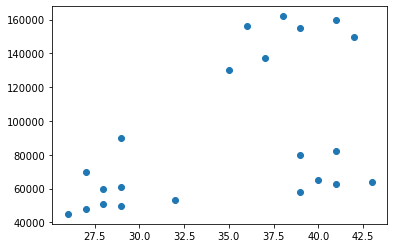

In [5]:
 plt.scatter(df.Age, df['Income($)'])
 plt.show()

In [6]:
# Form a KMeans object 
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
clusters = km.fit_predict(df[['Age', 'Income($)']])
clusters

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [8]:
df['clusters'] = clusters
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


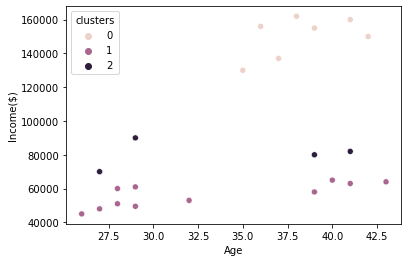

In [9]:
sns.scatterplot(x='Age', y= 'Income($)', data=df, hue='clusters')
plt.show()

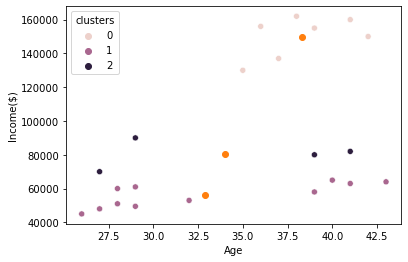

In [10]:
sns.scatterplot(x='Age', y= 'Income($)', data=df, hue='clusters')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])
plt.show()

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(df[['Age', 'Income($)']])
df[['Age','Income($)']] = scaler.transform(df[['Age','Income($)']])

In [13]:
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


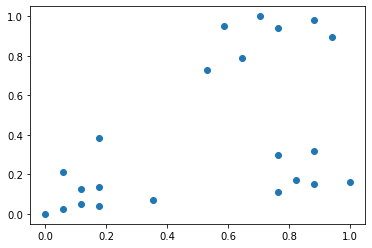

In [14]:
 plt.scatter(df.Age, df['Income($)'])
 plt.show()

In [15]:
clusters = km.fit_predict(df[['Age', 'Income($)']])
clusters

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [16]:
df['clusters'] = clusters
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


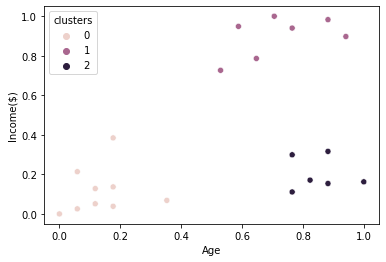

In [17]:
sns.scatterplot(x='Age', y= 'Income($)', data=df, hue='clusters')
plt.show()

In [18]:
print(km.cluster_centers_)

[[0.1372549  0.11633428]
 [0.72268908 0.8974359 ]
 [0.85294118 0.2022792 ]]


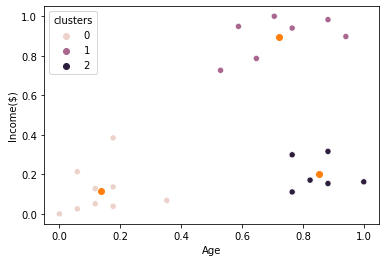

In [19]:
sns.scatterplot(x='Age', y= 'Income($)', data=df, hue='clusters')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])
plt.show()

In [20]:
k_rang = range(1, 10)
ssr = []
for k in k_rang:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income($)']])
  ssr.append(km.inertia_)

[5.434011511988179, 2.091136388699078, 0.4750783498553097, 0.3491047094419566, 0.2621792762345213, 0.22037641690770673, 0.18311629202780538, 0.13265419827245162, 0.10497488680620906]


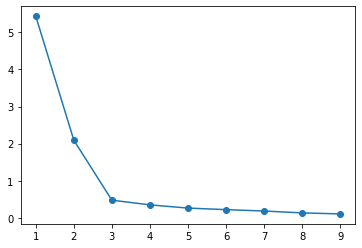

In [21]:
print(ssr)
plt.plot(k_rang, ssr, marker='o')
plt.show()